In [48]:
import pandas as pd
import json
from pandas import json_normalize
df=pd.read_excel(r'C:\Users\VINOTH\Documents\Sharmila_Projects\GUVI_Project_03_Old_Car_Price_Prediction\input_data\bangalore_cars.xlsx',header=[0])

In [49]:

s=df['new_car_detail']
print(s)

s = df['new_car_detail'].str.strip('"').str.replace("'", '"').str.replace("None", "null")

data = s.apply(json.loads)  # If each row is a separate JSON string
df1 = pd.json_normalize(data)


0       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
4       {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
                              ...                        
1476    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1477    {'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...
1478    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1479    {'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...
1480    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
Name: new_car_detail, Length: 1481, dtype: object


In [50]:
print(df1)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1476   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
1477   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
1478   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
1479   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
1480   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  centralVariantId  \
0      Maruti      Maruti Celerio       2015 

In [51]:
import pandas as pd
import json

# Load your Excel file
df=pd.read_excel(r'C:\Users\VINOTH\Documents\Sharmila_Projects\GUVI_Project_03_Old_Car_Price_Prediction\input_data\bangalore_cars.xlsx',header=[0])
#df = pd.read_excel('bangalore_cars.xlsx')

# Step 1: Clean if needed (only if JSON is a string)
# If your column already contains dicts, skip this.
# If they're strings, convert them to proper dicts
def to_dict(x):
    if isinstance(x, str):
        x = x.replace("'", '"').replace("None", "null")
        try:
            return json.loads(x)
        except:
            return None
    return x

df['parsed'] = df['new_car_overview'].apply(to_dict)

# Step 2: Extract and flatten the 'top' specs
def flatten_top(row):
    try:
        return {item['key']: item['value'] for item in row['top']}
    except:
        return None

df['flat'] = df['parsed'].apply(flatten_top)

# Step 3: Create new DataFrame from flattened specs
df2 = pd.DataFrame(df['flat'].tolist())

# Optional: Join with original df if you need other info
# final_df = df.join(df_flat)

# Done!
print(f"Rows in final DataFrame: {len(df2)}")
print(df2.head())


Rows in final DataFrame: 1481
  Registration Year     Insurance Validity Fuel Type    Seats    Kms Driven  \
0              2015  Third Party insurance    Petrol  5 Seats  1,20,000 Kms   
1          Feb 2018          Comprehensive    Petrol  5 Seats    32,706 Kms   
2         Sept 2018          Comprehensive    Petrol  5 Seats    11,949 Kms   
3          Dec 2014          Comprehensive    Petrol  5 Seats    17,794 Kms   
4              2015  Third Party insurance    Diesel  5 Seats    60,000 Kms   

    RTO     Ownership Engine Displacement Transmission  Year of Manufacture  
0  KA51   Third Owner              998 cc       Manual               2015.0  
1  KA05  Second Owner             1497 cc       Manual               2018.0  
2  KA03   First Owner             1199 cc       Manual               2018.0  
3  KA53   First Owner             1197 cc       Manual               2014.0  
4  KA04   First Owner             1248 cc       Manual               2015.0  


In [52]:
import pandas as pd
import json

# Step 1: Load Excel file
#df = pd.read_excel("bangalore_cars.xlsx")  # Update with your correct file path
df=pd.read_excel(r'C:\Users\VINOTH\Documents\Sharmila_Projects\GUVI_Project_03_Old_Car_Price_Prediction\input_data\bangalore_cars.xlsx',header=[0])

# Step 2: Parse JSON safely
def parse_json(x):
    try:
        if isinstance(x, str):
            x = x.replace("'", '"').replace("None", "null")
            return json.loads(x)
    except:
        pass
    return None

df['parsed'] = df['new_car_feature'].apply(parse_json)  # Replace with actual column name

# Step 3: Extract features for each row
def extract_features(row, car_id):
    result = {"car_id": car_id}
    try:
        # Category 1: 'top' section
        result["Category1"] = "Top Features"
        result["Feature1"] = ", ".join([item.get("value", "") for item in row.get("top", [])])

        # Categories 2–4 from 'data' section
        for i, section in enumerate(row.get("data", [])[:3]):
            result[f"Category{i+2}"] = f"{section.get('heading', '')} - {section.get('subHeading', '')}"
            result[f"Feature{i+2}"] = ", ".join([f.get("value", "") for f in section.get("list", [])])
    except Exception as e:
        print(f"Error at car_id {car_id}: {e}")
    return result

# Step 4: Build final dataframe
records = []
for idx, row in df.iterrows():
    parsed = row['parsed']
    car_id = row.get('car_id', idx)  # Use existing 'car_id' if present
    if parsed:
        records.append(extract_features(parsed, car_id))

df3 = pd.DataFrame(records)

# ✅ View and export
print(df3.head())
# final_df.to_excel("car_features_cleaned.xlsx", index=False)
#len(df)

   car_id     Category1                                           Feature1  \
0       0  Top Features  Power Steering, Power Windows Front, Air Condi...   
1       1  Top Features  Power Steering, Power Windows Front, Air Condi...   
2       2  Top Features  Power Steering, Power Windows Front, Air Condi...   
3       3  Top Features  Power Steering, Power Windows Front, Air Condi...   
4       4  Top Features  Power Steering, Power Windows Front, Air Condi...   

                         Category2  \
0  Comfort & Convenience - Comfort   
1  Comfort & Convenience - Comfort   
2  Comfort & Convenience - Comfort   
3  Comfort & Convenience - Comfort   
4  Comfort & Convenience - Comfort   

                                            Feature2            Category3  \
0  Power Steering, Power Windows Front, Power Win...  Interior - Interior   
1  Power Steering, Power Windows Front, Power Win...  Interior - Interior   
2  Power Steering, Power Windows Front, Power Win...  Interior - Interi

In [53]:
import pandas as pd
import json

# Load your Excel file
df=pd.read_excel(r'C:\Users\VINOTH\Documents\Sharmila_Projects\GUVI_Project_03_Old_Car_Price_Prediction\input_data\bangalore_cars.xlsx',header=[0])
#df = pd.read_excel('bangalore_cars.xlsx')

# Step 1: Clean if needed (only if JSON is a string)
# If your column already contains dicts, skip this.
# If they're strings, convert them to proper dicts
def to_dict(x):
    if isinstance(x, str):
        x = x.replace("'", '"').replace("None", "null")
        try:
            return json.loads(x)
        except:
            return None
    return x

df['parsed'] = df['new_car_specs'].apply(to_dict)

# Step 2: Extract and flatten the 'top' specs
def flatten_top(row):
    try:
        return {item['key']: item['value'] for item in row['top']}
    except:
        return None

df['flat'] = df['parsed'].apply(flatten_top)

# Step 3: Create new DataFrame from flattened specs
df4 = pd.DataFrame(df['flat'].tolist())

# Optional: Join with original df if you need other info
# final_df = df.join(df_flat)

# Done!
print(f"Rows in final DataFrame: {len(df4)}")
print(df4.head())


Rows in final DataFrame: 1481
      Mileage   Engine  Max Power    Torque Seats Wheel Size
0   23.1 kmpl   998 CC   67.04bhp      90Nm     5        NaN
1     17 kmpl  1497 CC  121.31bhp     150Nm     5         16
2  23.84 kmpl  1199 CC      84bhp     114Nm     5         14
3   19.1 kmpl  1197 CC   81.86bhp  113.75Nm     5         14
4  23.65 kmpl  1248 CC    88.5bhp     200Nm     5         16


In [54]:

import pandas as pd
df_all = pd.concat([df1, df2, df3, df4], axis=1)


In [55]:
len(df_all)


1481

In [56]:
df_all.shape[1]  # [rows, columns]


44

In [57]:
df_all.columns.tolist()


['it',
 'ft',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'owner',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'priceActual',
 'priceSaving',
 'priceFixedText',
 'trendingText.imgUrl',
 'trendingText.heading',
 'trendingText.desc',
 'Registration Year',
 'Insurance Validity',
 'Fuel Type',
 'Seats',
 'Kms Driven',
 'RTO',
 'Ownership',
 'Engine Displacement',
 'Transmission',
 'Year of Manufacture',
 'car_id',
 'Category1',
 'Feature1',
 'Category2',
 'Feature2',
 'Category3',
 'Feature3',
 'Category4',
 'Feature4',
 'Mileage',
 'Engine',
 'Max Power',
 'Torque',
 'Seats',
 'Wheel Size']

In [58]:
df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,parsed,flat
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '23.1 kmpl', 'Engine': '998 CC', '..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '17 kmpl', 'Engine': '1497 CC', 'M..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '23.84 kmpl', 'Engine': '1199 CC',..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '19.1 kmpl', 'Engine': '1197 CC', ..."
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '23.65 kmpl', 'Engine': '1248 CC',..."
...,...,...,...,...,...,...,...
1476,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '12.55 kmpl', 'Engine': '2982 CC',..."
1477,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '15 kmpl', 'Engine': '1586 CC', 'M..."
1478,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '19.4 kmpl', 'Engine': '1198 CC', ..."
1479,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,"{'heading': 'Specifications', 'top': [{'key': ...","{'Mileage': '22.54 kmpl', 'Engine': '1396 CC',..."


In [59]:
df_all

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,car_id,Category1,Feature1,Category2,Feature2,Category3,Feature3,Category4,Feature4,Mileage,Engine,Max Power,Torque,Seats,Wheel Size
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,0,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Digital Odometer, Ele...",Exterior - Exterior,"Adjustable Head Lights, Manually Adjustable Ex...",23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,1,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",17 kmpl,1497 CC,121.31bhp,150Nm,5,16
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,2,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.84 kmpl,1199 CC,84bhp,114Nm,5,14
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0,3,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Diesel,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0,4,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,0,Diesel,SUV,"1,56,039",Manual,2,2nd Owner,Toyota,Toyota Fortuner,2012,2253,4x4 MT,₹ 16.49 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chance

In [60]:
### steps
# 1. encode non numerical features into numerical values
# 2. Perform correlation map & filter out highly correlated variables . Lets say if correlation > 0.8, we can consider as highly correlated variables
# 3. use random forest regression to indetify most influential input features
# 4. choose only top 10 input features
# 5. run random forest model with only 10 input featurs
# 6. finetune the hyperparameters (you can use hyper opt)
# 7. choose best hyper parameter model based on test data 
# 8. use this model for app building


In [61]:
print(df_all.dtypes)

it                        int64
ft                       object
bt                       object
km                       object
transmission             object
ownerNo                   int64
owner                    object
oem                      object
model                    object
modelYear                 int64
centralVariantId          int64
variantName              object
price                    object
priceActual              object
priceSaving              object
priceFixedText           object
trendingText.imgUrl      object
trendingText.heading     object
trendingText.desc        object
Registration Year        object
Insurance Validity       object
Fuel Type                object
Seats                    object
Kms Driven               object
RTO                      object
Ownership                object
Engine Displacement      object
Transmission             object
Year of Manufacture     float64
car_id                    int64
Category1                object
Feature1

In [62]:
print(type(df_all))


<class 'pandas.core.frame.DataFrame'>


In [63]:
df_all.head()  # shows first 5 rows


,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,car_id,Category1,Feature1,Category2,Feature2,Category3,Feature3,Category4,Feature4,Mileage,Engine,Max Power,Torque,Seats,Wheel Size
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,0,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Digital Odometer, Ele...",Exterior - Exterior,"Adjustable Head Lights, Manually Adjustable Ex...",23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,1,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",17 kmpl,1497 CC,121.31bhp,150Nm,5,16
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,2,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.84 kmpl,1199 CC,84bhp,114Nm,5,14
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0,3,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Diesel,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0,4,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16


In [64]:
df_all.head()  # s

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,car_id,Category1,Feature1,Category2,Feature2,Category3,Feature3,Category4,Feature4,Mileage,Engine,Max Power,Torque,Seats,Wheel Size
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,0,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Digital Odometer, Ele...",Exterior - Exterior,"Adjustable Head Lights, Manually Adjustable Ex...",23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,1,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",17 kmpl,1497 CC,121.31bhp,150Nm,5,16
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,2,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.84 kmpl,1199 CC,84bhp,114Nm,5,14
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0,3,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Diesel,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0,4,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16


In [65]:
list(df_all.columns)


['it',
 'ft',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'owner',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'priceActual',
 'priceSaving',
 'priceFixedText',
 'trendingText.imgUrl',
 'trendingText.heading',
 'trendingText.desc',
 'Registration Year',
 'Insurance Validity',
 'Fuel Type',
 'Seats',
 'Kms Driven',
 'RTO',
 'Ownership',
 'Engine Displacement',
 'Transmission',
 'Year of Manufacture',
 'car_id',
 'Category1',
 'Feature1',
 'Category2',
 'Feature2',
 'Category3',
 'Feature3',
 'Category4',
 'Feature4',
 'Mileage',
 'Engine',
 'Max Power',
 'Torque',
 'Seats',
 'Wheel Size']

In [66]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)


In [67]:
df_all.head(3)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText.imgUrl,trendingText.heading,trendingText.desc,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,car_id,Category1,Feature1,Category2,Feature2,Category3,Feature3,Category4,Feature4,Mileage,Engine,Max Power,Torque,Seats,Wheel Size
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,0,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Digital Odometer, Ele...",Exterior - Exterior,"Adjustable Head Lights, Manually Adjustable Ex...",23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,1,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",17 kmpl,1497 CC,121.31bhp,150Nm,5,16
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,https://stimg.cardekho.com/used-cars/common/ic...,Trending Car!,High chances of sale in next 6 days,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,2,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.84 kmpl,1199 CC,84bhp,114Nm,5,14


In [68]:
# Step 1: Remove commas in the 'Mileage' column
df_all['km'] = df_all['km'].str.replace(',', '')

# Step 2: Convert the 'Mileage' column to numeric (int if possible)
df_all['km'] = pd.to_numeric(df_all['km'], errors='coerce')

# Step 3: Convert to integer (if you prefer no decimal points)
df_all['km'] = df_all['km'].astype('Int64')  # This will keep NaNs as NaN


In [69]:
df_all.drop(columns=['owner'], inplace=True)


In [70]:
def convert_price_string(price_str):
    price_str = str(price_str).lower().replace('₹', '').replace(',', '').strip()
    if 'lakh' in price_str:
        return float(price_str.replace('lakh', '').strip()) * 100000
    elif 'crore' in price_str:
        return float(price_str.replace('crore', '').strip()) * 10000000
    else:
        return pd.to_numeric(price_str, errors='coerce')

df_all['price'] = df_all['price'].apply(convert_price_string)


In [71]:
df_all['priceSaving'].unique()
 # Check unique values in the 'price' column

array([''], dtype=object)

In [72]:
(df_all['priceSaving'] == '').sum()       # Empty strings
df_all['priceSaving'].isna().sum()        # NaNs


0

In [73]:
df_all['priceSaving'] = df_all['priceSaving'].astype(str).str.strip()

# Now check again
df_all['priceSaving'].unique()


array([''], dtype=object)

In [74]:
(df_all['priceSaving'] == '').sum()


1481

In [75]:
df_all.drop(columns=['priceSaving'], inplace=True)

In [76]:
def convert_price_string(price_str):
    price_str = str(price_str).lower().replace('₹', '').replace(',', '').strip()
    if 'lakh' in price_str:
        return float(price_str.replace('lakh', '').strip()) * 100000
    elif 'crore' in price_str:
        return float(price_str.replace('crore', '').strip()) * 10000000
    else:
        return pd.to_numeric(price_str, errors='coerce')

df_all['priceActual'] = df_all['priceActual'].apply(convert_price_string)


In [77]:
df_all.drop(columns=['priceFixedText','trendingText.imgUrl','trendingText.heading','trendingText.desc'], inplace=True)

In [78]:
df_all['Registration Year'] = df_all['Registration Year'].str.extract(r'(\d{4})')


In [79]:
df_all.drop(columns=['ft'], inplace=True)

In [80]:
# Remove commas and 'Kms' from the 'Kms Driven' column
df_all['Kms Driven'] = df_all['Kms Driven'].str.replace(',', '')  # Remove commas
df_all['Kms Driven'] = df_all['Kms Driven'].str.replace(' Kms', '')  # Remove ' Kms'

# Convert the column to numeric (if you want to convert it to an integer or float)
df_all['Kms Driven'] = pd.to_numeric(df_all['Kms Driven'], errors='coerce')

# Show the cleaned column
#print(df_all['Kms Driven'])


In [81]:
df_all['Max Power'] = df_all['Max Power'].astype(str).str.extract(r'([\d.]+)').astype(float)

df_all['Torque'] = df_all['Torque'].astype(str).str.extract(r'([\d.]+)').astype(float)


#df_all['Engine Displacement'] = df_all['Engine Displacement'].astype(str).str.extract(r'([\d.]+)').astype(float)

In [82]:
# Remove any text like 'kmpl', 'km/kg', or 'km' (case-insensitive), and strip spaces
df_all['Mileage'] = df_all['Mileage'].str.replace(r'[^\d\.]', '', regex=True)

# Convert to numeric, errors='coerce' will turn bad values into NaN
df_all['Mileage'] = pd.to_numeric(df_all['Mileage'], errors='coerce')

# Show cleaned values
#print(df_all['Mileage']

In [83]:
(df_all['Engine'] == df_all['Engine Displacement']).all()  # True if all values match


False

In [84]:
df_all['Engine Displacement'] = df_all['Engine Displacement'].astype(str).str.extract(r'([\d.]+)').astype(float)
df_all['Engine'] = df_all['Engine'].astype(str).str.extract(r'([\d.]+)').astype(float)

In [85]:
df_all['seats'] = df4['Seats']


In [86]:
list(df_all.columns)

['it',
 'bt',
 'km',
 'transmission',
 'ownerNo',
 'oem',
 'model',
 'modelYear',
 'centralVariantId',
 'variantName',
 'price',
 'priceActual',
 'Registration Year',
 'Insurance Validity',
 'Fuel Type',
 'Seats',
 'Kms Driven',
 'RTO',
 'Ownership',
 'Engine Displacement',
 'Transmission',
 'Year of Manufacture',
 'car_id',
 'Category1',
 'Feature1',
 'Category2',
 'Feature2',
 'Category3',
 'Feature3',
 'Category4',
 'Feature4',
 'Mileage',
 'Engine',
 'Max Power',
 'Torque',
 'Seats',
 'Wheel Size',
 'seats']

In [87]:
df_all.head(5)

,it,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,priceActual,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,car_id,Category1,Feature1,Category2,Feature2,Category3,Feature3,Category4,Feature4,Mileage,Engine,Max Power,Torque,Seats,Wheel Size,seats
0,0,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,NaN,2015,Third Party insurance,Petrol,5 Seats,120000,KA51,Third Owner,998.0,Manual,2015.0,0,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Digital Odometer, Ele...",Exterior - Exterior,"Adjustable Head Lights, Manually Adjustable Ex...",23.10,998.0,67.04,90.00,5,NaN,5
1,0,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,NaN,2018,Comprehensive,Petrol,5 Seats,32706,KA05,Second Owner,1497.0,Manual,2018.0,1,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",17.00,1497.0,121.31,150.00,5,16,5
2,0,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,NaN,2018,Comprehensive,Petrol,5 Seats,11949,KA03,First Owner,1199.0,Manual,2018.0,2,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.84,1199.0,84.00,114.00,5,14,5
3,0,Sedan,17794,Manual,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,NaN,2014,Comprehensive,Petrol,5 Seats,17794,KA53,First Owner,1197.0,Manual,2014.0,3,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",19.10,1197.0,81.86,113.75,5,14,5
4,0,SUV,60000,Manual,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,NaN,2015,Third Party insurance,Diesel,5 Seats,60000,KA04,First Owner,1248.0,Manual,2015.0,4,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.65,1248.0,88.50,200.00,5,16,5


In [88]:
df_all.isnull().sum()  # Count missing (NaN) values in each column


it                        0
bt                        0
km                        0
transmission              0
ownerNo                   0
oem                       0
model                     0
modelYear                 0
centralVariantId          0
variantName               0
price                     0
priceActual            1170
Registration Year         7
Insurance Validity        3
Fuel Type                 0
Seats                     1
Kms Driven                0
RTO                     168
Ownership                 0
Engine Displacement       3
Transmission              0
Year of Manufacture       7
car_id                    0
Category1                 0
Feature1                  0
Category2                14
Feature2                 14
Category3                17
Feature3                 17
Category4                20
Feature4                 20
Mileage                  42
Engine                    3
Max Power                16
Torque                   16
Seats               

In [89]:
df_all.drop(columns=['priceActual'], inplace=True)

In [90]:
# Strip whitespace from all column names
df_all.columns = df_all.columns.str.strip()

# Forward fill the 'Registration Year' column
df_all['Registration Year'] = df_all['Registration Year'].fillna(method='bfill')


C:\Users\VINOTH\AppData\Local\Temp\ipykernel_16176\539316171.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_all['Registration Year'] = df_all['Registration Year'].fillna(method='bfill')


In [91]:
# Clean up column names to remove extra spaces
df_all.columns = df_all.columns.str.strip()

# Impute missing values in 'Insurance Validity' with the mode
mode_val = df_all['Insurance Validity'].mode()[0]
df_all['Insurance Validity'] = df_all['Insurance Validity'].fillna(mode_val)


In [92]:
# Drop the 'Seats_1' column
df_all = df_all.drop(columns=['Seats_1'])

# Verify the column has been dropped
print(df_all.columns)


KeyError: "['Seats_1'] not found in axis"

In [ ]:
## Print the first 15 rows of the 'Seats' column
print(df_all['seats'].head(15))



0     5
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    7
Name: seats, dtype: object


In [ ]:

df_all.columns = ['Seats_1' if col == 'Seats' else col for col in df_all.columns]
print(df_all.columns)


Index(['it', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'centralVariantId', 'variantName', 'price',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats_1',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'car_id', 'Category1', 'Feature1', 'Category2',
       'Feature2', 'Category3', 'Feature3', 'Category4', 'Feature4', 'Mileage',
       'Engine', 'Max Power', 'Torque', 'Seats_1', 'Wheel Size', 'seats'],
      dtype='object')


In [ ]:
# Clean up column names to remove extra spaces
df_all.columns = df_all.columns.str.strip()

# Impute missing values in 'Insurance Validity' with the mode
mode_val = df_all['RTO'].mode()[0]
df_all['RTO'] = df_all['RTO'].fillna(mode_val)


In [ ]:
# Clean up column names to remove extra spaces
df_all.columns = df_all.columns.str.strip()

# Impute missing values in 'Insurance Validity' with the mode
mode_val = df_all['Engine Displacement'].mode()[0]
df_all['Engine Displacement'] = df_all['Engine Displacement'].fillna(mode_val)


In [ ]:
# Clean up column names to remove extra spaces
df_all.columns = df_all.columns.str.strip()

# Impute missing values in 'Insurance Validity' with the mode
mode_val = df_all['Year of Manufacture'].mode()[0]
df_all['Year of Manufacture'] = df_all['Year of Manufacture'].fillna(mode_val)


In [ ]:
# List of columns to impute
columns_to_impute = ['Category2', 'Feature2', 'Category3', 'Feature3', 'Category4', 'Feature4']

# Iterate over each column and fill missing values with the mode (most frequent value)
for column in columns_to_impute:
    mode_value = df_all[column].mode()[0]  # Get the most frequent value (mode)
    df_all[column] = df_all[column].fillna(mode_value)

# # Verify the result
# print(df_all[columns_to_impute].head(15))


In [ ]:
# List of columns to impute
columns_to_impute = ['Mileage', 'Engine', 'Max Power', 'Torque', 'Wheel Size','seats']

# Iterate over each column and fill missing values with the mode (most frequent value)
for column in columns_to_impute:
    mode_value = df_all[column].mode()[0]  # Get the most frequent value (mode)
    df_all[column] = df_all[column].fillna(mode_value)



In [ ]:
df_all.isnull().sum() 

it                     0
bt                     0
km                     0
transmission           0
ownerNo                0
oem                    0
model                  0
modelYear              0
centralVariantId       0
variantName            0
price                  0
Registration Year      0
Insurance Validity     0
Fuel Type              0
Kms Driven             0
RTO                    0
Ownership              0
Engine Displacement    0
Transmission           0
Year of Manufacture    0
car_id                 0
Category1              0
Feature1               0
Category2              0
Feature2               0
Category3              0
Feature3               0
Category4              0
Feature4               0
Mileage                0
Engine                 0
Max Power              0
Torque                 0
Wheel Size             0
seats                  0
dtype: int64

In [ ]:
# First, convert 'Registration Year' to numeric, forcing errors to NaN
df_all['Registration Year'] = pd.to_numeric(df_all['Registration Year'], errors='coerce')

# Now, convert 'Registration Year' to int (after handling NaN values)
df_all['Registration Year'] = df_all['Registration Year'].fillna(0).astype(int)



0     2015
1     2018
2     2018
3     2014
4     2015
5     2020
6     2017
7     2021
8     2018
9     2018
10    2018
11    2019
12    2018
13    2018
14    2014
Name: Registration Year, dtype: int32


In [ ]:
df_all['Wheel Size'] = pd.to_numeric(df_all['Wheel Size'], errors='coerce')

# Now, convert 'Registration Year' to int (after handling NaN values)
df_all['Wheel Size'] = df_all['Wheel Size'].fillna(0).astype(int)


In [ ]:
df_all['seats'] = pd.to_numeric(df_all['seats'], errors='coerce')

# Now, convert 'Registration Year' to int (after handling NaN values)
df_all['seats'] = df_all['seats'].fillna(0).astype(int)


In [ ]:
# Check the data types of all columns
print(df_all.dtypes)


it                       int64
bt                      object
km                       Int64
transmission            object
ownerNo                  int64
oem                     object
model                   object
modelYear                int64
centralVariantId         int64
variantName             object
price                  float64
Registration Year        int32
Insurance Validity      object
Fuel Type               object
Kms Driven               int64
RTO                     object
Ownership               object
Engine Displacement    float64
Transmission            object
Year of Manufacture    float64
car_id                   int64
Category1               object
Feature1                object
Category2               object
Feature2                object
Category3               object
Feature3                object
Category4               object
Feature4                object
Mileage                float64
Engine                 float64
Max Power              float64
Torque  

In [ ]:
# Make a copy of the DataFrame
df_copy = df_all.copy()




In [ ]:
df_copy.head(3)

,it,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,car_id,Category1,Feature1,Category2,Feature2,Category3,Feature3,Category4,Feature4,Mileage,Engine,Max Power,Torque,Wheel Size,seats
0,0,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,2015,Third Party insurance,Petrol,120000,KA51,Third Owner,998.0,Manual,2015.0,0,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Digital Odometer, Ele...",Exterior - Exterior,"Adjustable Head Lights, Manually Adjustable Ex...",23.10,998.0,67.04,90.0,16,5
1,0,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,2018,Comprehensive,Petrol,32706,KA05,Second Owner,1497.0,Manual,2018.0,1,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",17.00,1497.0,121.31,150.0,16,5
2,0,Hatchback,11949,Manual,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,2018,Comprehensive,Petrol,11949,KA03,First Owner,1199.0,Manual,2018.0,2,Top Features,"Power Steering, Power Windows Front, Air Condi...",Comfort & Convenience - Comfort,"Power Steering, Power Windows Front, Power Win...",Interior - Interior,"Air Conditioner, Heater, Adjustable Steering, ...",Exterior - Exterior,"Adjustable Head Lights, Fog Lights Front, Powe...",23.84,1199.0,84.00,114.0,14,5


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a copy of your DataFrame (optional but good practice)
df_all = df_all.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to label encode (excluding 'Fuel Type')
label_encode_columns = ['bt', 'Transmission', 'oem', 'model', 'variantName',
                        'Insurance Validity', 'RTO', 'Ownership',
                        'Category1', 'Feature1', 'Category2', 'Feature2',
                        'Category3', 'Feature3', 'Category4', 'Feature4']

# Apply Label Encoding
for column in label_encode_columns:
    if df_all[column].dtype == 'object':
        df_all[column] = label_encoder.fit_transform(df_all[column].astype(str))

# Clean column names (remove leading/trailing spaces)
df_all.columns = df_all.columns.str.strip()

# Apply One-Hot Encoding only for 'Fuel Type'
if 'Fuel Type' in df_all.columns:
    df_all = pd.get_dummies(df_all, columns=['Fuel Type'], drop_first=False)

# Display the result
print(df_all.head(15))


    it  bt      km  transmission  ownerNo  oem  model  modelYear  \
0    0   2  120000             1        3   17    106       2015   
1    0   6   32706             1        2    6     32       2018   
2    0   2   11949             1        1   25    176       2018   
3    0   7   17794             1        1    8     60       2014   
4    0   6   60000             1        1   17    119       2015   
5    0   6   20000             1        1   10     69       2020   
6    0   2   37772             1        1    4     24       2017   
7    0   6   30000             0        1    8     58       2021   
8    0   7   37000             0        1   17    108       2018   
9    0   2   11949             1        1   25    176       2017   
10   0   2   50000             1        1   17    104       2018   
11   0   2   24887             0        1    8     52       2019   
12   0   2   23000             0        1    7     43       2018   
13   0   2   48928             0        1   25  

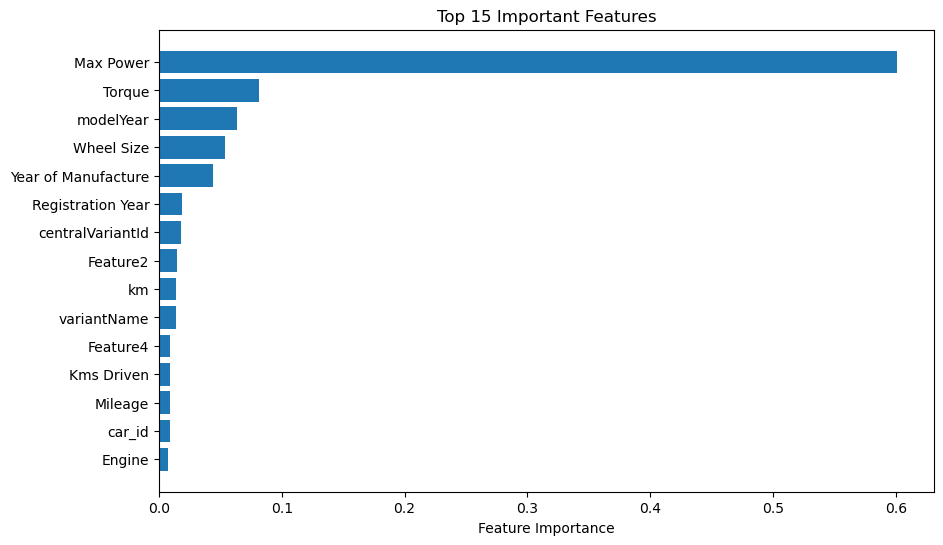

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# X = features, y = target variable
X = df_all.drop('price', axis=1)  # assuming 'price' is your target
y = df_all['price']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'][:15][::-1], feat_imp['Importance'][:15][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features')
plt.show()


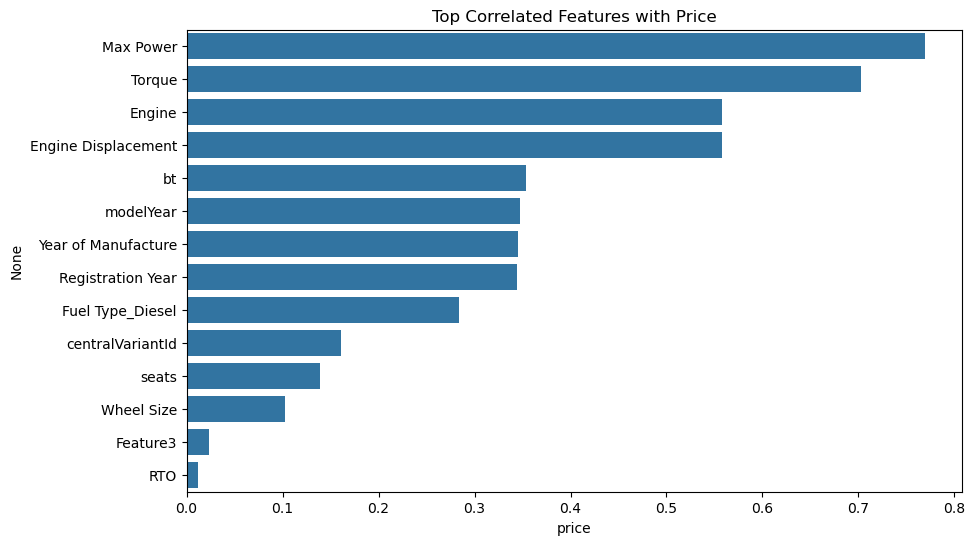

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlation with target
corr = df_all.corr(numeric_only=True)['price'].sort_values(ascending=False)

# Plot top correlated features
plt.figure(figsize=(10,6))
sns.barplot(x=corr[1:15], y=corr.index[1:15])  # skip target itself
plt.title('Top Correlated Features with Price')
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Features selected
selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(selected_features)


Selected Features by RFE:
Index(['bt', 'transmission', 'ownerNo', 'Transmission', 'Year of Manufacture',
       'Category4', 'seats', 'Fuel Type_Electric', 'Fuel Type_LPG',
       'Fuel Type_Petrol'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Step 1: Define features & target
# -------------------------------
X = df_all.drop('price', axis=1)  # all features
y = df_all['price']               # target

# -------------------------------
# Step 2: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 3: Train the model
# -------------------------------
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# Step 4: Predict and evaluate
# -------------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Trained!")
print(f"🔍 Mean Squared Error: {mse:.2f}")
print(f"🎯 R-squared Score: {r2:.2f}")


✅ Model Trained!
🔍 Mean Squared Error: 85569563112.12
🎯 R-squared Score: 0.83


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Step 1: Define features & target
# -------------------------------
X = df_all.drop('price', axis=1)
y = df_all['price']

# -------------------------------
# Step 2: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 3: Train the XGBoost model
# -------------------------------
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# -------------------------------
# Step 4: Predict and evaluate
# -------------------------------
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ XGBoost Model Trained!")
print(f"🔍 Mean Squared Error: {mse:.2f}")
print(f"🎯 R-squared Score: {r2:.2f}")


✅ XGBoost Model Trained!
🔍 Mean Squared Error: 80173680106.36
🎯 R-squared Score: 0.84


In [ ]:
#todo
#oultier removal in input data, output data
#look for XGboost hyperparameter tuning (HYPEROPT)

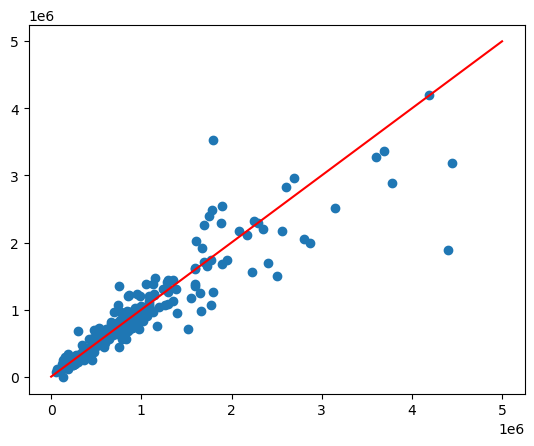

In [ ]:
plt.plot(y_test,y_pred,'o')
plt.plot([0,5e6],[0,5e6],'r')

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # -------------------------------
# # Step 1: Define features & target
# # -------------------------------
# X = df_all.drop('price', axis=1)
# y = df_all['price']

# # -------------------------------
# # Step 2: Train-test split
# # -------------------------------
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # -------------------------------
# # Step 3: Train the model
# # -------------------------------
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# # -------------------------------
# # Step 4: Predict and evaluate
# # -------------------------------
# y_pred = lr_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("✅ Linear Regression Model Trained!")
# print(f"🔍 Mean Squared Error: {mse:.2f}")
# print(f"🎯 R-squared Score: {r2:.2f}")


✅ Linear Regression Model Trained!
🔍 Mean Squared Error: 199648661768.57
🎯 R-squared Score: 0.60


In [ ]:
mse/y_train.mean()

206349.6217400972

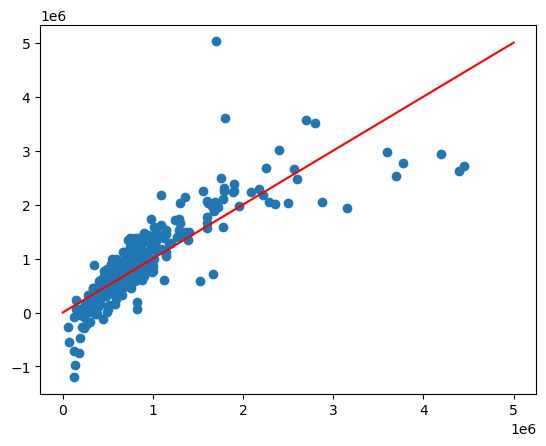

In [ ]:
plt.plot(y_test,y_pred,'o')
plt.plot([0,5e6],[0,5e6],'r')

In [93]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Step 0: Outlier Removal (IQR Method) — Only on Numeric Columns
# -------------------------------
numeric_cols = df_all.select_dtypes(include=[np.number])  # Only numeric columns

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get a mask of non-outliers
mask = ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)

# Apply mask to the full dataframe (keep all columns)
df_filtered = df_all[mask]

print(f"📊 Original dataset shape: {df_all.shape}")
print(f"🧹 After outlier removal: {df_filtered.shape}")

# -------------------------------
# Step 1: Define features & target
# -------------------------------
X = df_filtered.drop('price', axis=1)
y = df_filtered['price']

# -------------------------------
# Step 2: Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 3: Train the XGBoost model
# -------------------------------
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# -------------------------------
# Step 4: Predict and evaluate
# -------------------------------
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ XGBoost Model Trained after Outlier Removal!")
print(f"🔍 Mean Squared Error: {mse:.2f}")
print(f"🎯 R-squared Score: {r2:.2f}")


📊 Original dataset shape: (1481, 37)
🧹 After outlier removal: (1154, 37)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:bt: object, transmission: object, oem: object, model: object, variantName: object, Registration Year: object, Insurance Validity: object, Fuel Type: object, Seats: object, RTO: object, Ownership: object, Transmission: object, Category1: object, Feature1: object, Category2: object, Feature2: object, Category3: object, Feature3: object, Category4: object, Feature4: object, Seats: object, Wheel Size: object, seats: object